# Global Health Statistics Analysis

This project analyzes global health statistics and their determinants. We explore trends, correlations, and insights into global health metrics.

In [1]:
import numpy as np
import pandas as pd

## Data Overview

The dataset provides global health statistics with various attributes such as prevalence rates, treatment costs, mortality rates, and socio-economic indicators. We start by examining the structure of the dataset and preparing it for analysis.

In [2]:
healthData = pd.read_csv('Global Health Statistics.csv')


In [3]:
# Checking for missing values and data types
healthData.info()

# Summary statistics of the dataset
healthData.describe()

### Correlation Heatmap

The correlation heatmap highlights the strength of relationships between different numerical features in the dataset. For example, a strong positive correlation between 'Education Index' and 'Recovery Rate (%)' could suggest that higher education levels are associated with better recovery outcomes. On the other hand, negative correlations might indicate factors that hinder recovery or contribute to higher mortality rates. This helps identify key variables for further analysis.

The health data was downloaded from a public licensed kaggle dataset uploaded by user 'MalaiarasuGRaj' and is updated regularly. 
Link: https://www.kaggle.com/datasets/malaiarasugraj/global-health-statistics

### Urbanization Rate vs Mortality Rate

This scatter plot explores how urbanization impacts mortality rates. A downward trend would suggest that more urbanized areas tend to have lower mortality rates, possibly due to better healthcare infrastructure. Conversely, an upward trend might indicate that urban areas face unique health challenges that increase mortality rates. Identifying outliers could also reveal regions that deviate from expected patterns.

In [24]:
healthData.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


### Distribution of Treatment Types

This bar chart visualizes the frequency of various treatment types used globally. A dominance of one type, such as 'Medication,' could indicate that it is the most accessible or cost-effective approach. Rare treatment types might suggest limited access or specialized use in specific cases. Understanding this distribution provides insight into global healthcare practices.

This project is meant to be a comprehensive guide analyzing global health statistics as well as it's determinants. Throughout this project we weill establish multiple correlations and attempt to reasonably deduce causations within our pursuit for further understanding determinants of global health.

### Recovery Rates by Disease Category

The box plot illustrates the variation in recovery rates across different disease categories. For instance, a high median recovery rate for a category like 'Vaccinable Diseases' might reflect effective preventive measures. Wide variability in certain categories could indicate inconsistent treatment outcomes or disparities in healthcare quality. This analysis can guide targeted interventions in underperforming categories.

It's important that we understand the data set that we are analyzing before we start operating on it. We are going to use functions in the pandas library to explore the data set and find out more about what we can learn.


In [25]:
#To get an overview of the data:
print(healthData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 22 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Name                        1000000 non-null  object 
 3   Disease Category                    1000000 non-null  object 
 4   Prevalence Rate (%)                 1000000 non-null  float64
 5   Incidence Rate (%)                  1000000 non-null  float64
 6   Mortality Rate (%)                  1000000 non-null  float64
 7   Age Group                           1000000 non-null  object 
 8   Gender                              1000000 non-null  object 
 9   Population Affected                 1000000 non-null  int64  
 10  Healthcare Access (%)               1000000 non-null  float64
 11  Doctors per 

We also need to check for null values and clean the data if such values exist in the data set.

In [26]:
#to check for missing values in the csv.
print(healthData.isnull().sum())

Country                               0
Year                                  0
Disease Name                          0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Population Affected                   0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Average Treatment Cost (USD)          0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Improvement in 5 Years (%)            0
Per Capita Income (USD)               0
Education Index                       0
Urbanization Rate (%)                 0
dtype: int64


The data set seems to have no null values in any of the columns. Therefore, in terms of cleaning, we do not need to worry abut accounting for null values.

To add even more context to the data set, we can use pandas to collect summary statistics for the collumns. The pandas library does all of these applications implicitly when the 'descibe' function is called. We get useful information such as the count in each column, the standard deviation, mean and quartiles of numerically represented data as well as the maximums and minimums of the data.

In [27]:
print(healthData.describe())

                 Year  Prevalence Rate (%)  Incidence Rate (%)  \
count  1000000.000000       1000000.000000      1000000.000000   
mean      2011.996999            10.047992            7.555005   
std          7.217287             5.740189            4.298947   
min       2000.000000             0.100000            0.100000   
25%       2006.000000             5.090000            3.840000   
50%       2012.000000            10.040000            7.550000   
75%       2018.000000            15.010000           11.280000   
max       2024.000000            20.000000           15.000000   

       Mortality Rate (%)  Population Affected  Healthcare Access (%)  \
count      1000000.000000       1000000.000000         1000000.000000   
mean             5.049919        500735.427363              74.987835   
std              2.859427        288660.116648              14.436345   
min              0.100000          1000.000000              50.000000   
25%              2.580000        250491.

We can analyze more specific key metrics within the data.

In [28]:
#It may be useful to know which country has the highest prevalence rate.
max_prevalence_row = healthData.loc[healthData['Prevalence Rate (%)'].idxmax()]
print(max_prevalence_row)

Country                                 Japan
Year                                     2023
Disease Name                             Zika
Disease Category                      Chronic
Prevalence Rate (%)                      20.0
Incidence Rate (%)                      12.67
Mortality Rate (%)                       2.03
Age Group                               36-60
Gender                                  Other
Population Affected                    729604
Healthcare Access (%)                    83.5
Doctors per 1000                         4.02
Hospital Beds per 1000                   4.48
Treatment Type                        Surgery
Average Treatment Cost (USD)            18212
Availability of Vaccines/Treatment         No
Recovery Rate (%)                       55.39
DALYs                                     700
Improvement in 5 Years (%)               8.31
Per Capita Income (USD)                 75702
Education Index                          0.83
Urbanization Rate (%)             

This gives us the details of the country with the highest prevalance rate, including but not limited to the country name, disease and category and other useful statistics.
The prevalence rate is a measure of the number of people in a population who a disease or health condition at a specific time. The typical calculation is a percentage of the the number of cases of a health condition over the total population. 
We should note that just because a certain country has the highest prevalence rate, it doesn't mean that it had the most cases of any specific disease as prevalance rate is a proportion against the total population of a country.

Important Note about the loc vs iloc method in pandas. 
The loc method is label-based indexing, which means that it uses row and column labels(names or indices).
The iloc method is position-based indexing which means that it uses row and column integer positions.

In [29]:
#Compare disease categories by prevalance
category_avg_prevalnace = healthData.groupby('Disease Category')['Prevalence Rate (%)'].mean()
print(category_avg_prevalnace)

Disease Category
Autoimmune        10.035589
Bacterial         10.057957
Cardiovascular    10.052995
Chronic           10.030239
Genetic           10.049714
Infectious        10.003284
Metabolic         10.058104
Neurological      10.058557
Parasitic         10.041921
Respiratory       10.057077
Viral             10.082373
Name: Prevalence Rate (%), dtype: float64


This gives us the avaergae prevalence rate of each category of disease. From this table, we can gather that viral diseases have the highest prevalance rate. Information like this may help doctors, biologists and surveyors understand the spread of diseases better.

In [30]:
#Correlation between healthcare access and recovery rate:
correlation = healthData[['Healthcare Access (%)', 'Recovery Rate (%)']].corr()
print(correlation)

                       Healthcare Access (%)  Recovery Rate (%)
Healthcare Access (%)               1.000000           0.001598
Recovery Rate (%)                   0.001598           1.000000


We can see that there is a high correlation between Healthcare Access and Recovery Status.

We also need visual representaion of the data to simplify ot further. To accomplish this, we are going to use graphing functions from the matplotlib and seaborn libraries.

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

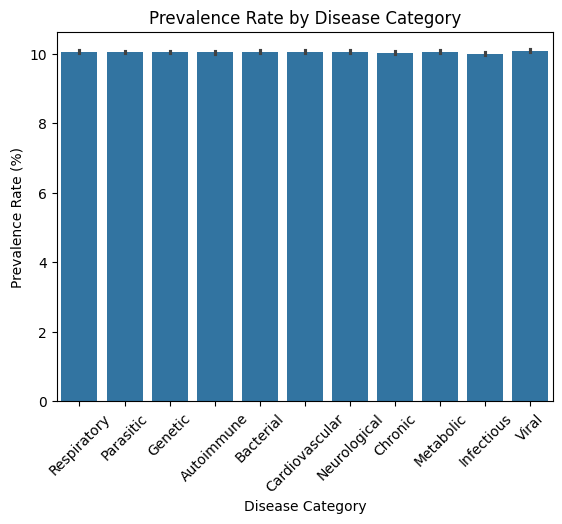

In [32]:
#Bar plot for disease categories by prevalance
sns.barplot(x='Disease Category', y='Prevalence Rate (%)', data = healthData)
plt.xticks(rotation = 45)
plt.title("Prevalence Rate by Disease Category")
plt.show()


From the bar graph we can gather that the different categories of diseases are all close to each other in terms of prevalence.

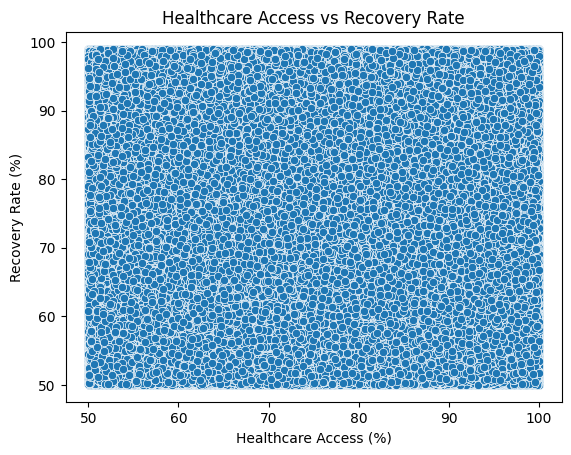

In [33]:
#Scatter Plot correlatng Healthcare Access against Recovery Rate
sns.scatterplot(x = 'Healthcare Access (%)', y = 'Recovery Rate (%)', data = healthData)
plt.title("Healthcare Access vs Recovery Rate")
plt.show()

It may be difficult to determine correlation from a scatterplot such as the one above so additional methods and information is required in order to make more sense of our data set.

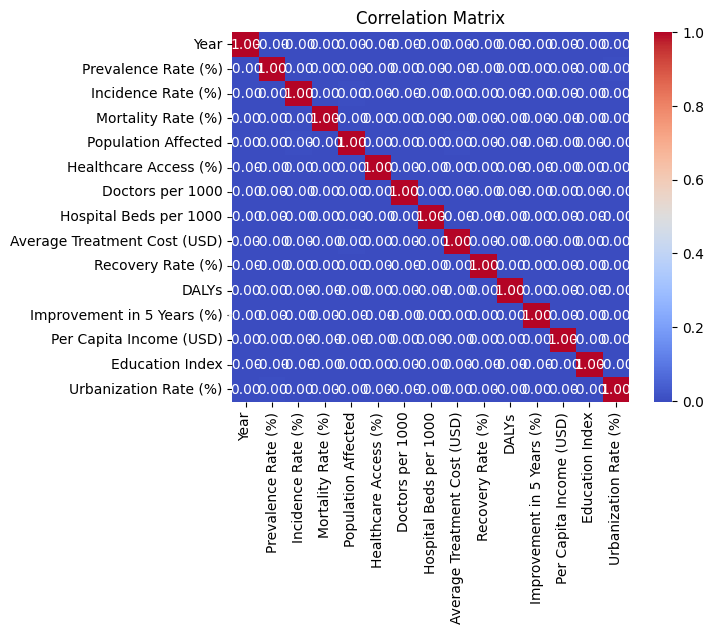

In [34]:
#Correlation Matric, Heatmap for correlations
numeric_data = healthData.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


Note: 
DALYs stand for Disability Adjusted Life Years.

We can ramk the diseases by the impact that they have Disability Adjusted Life Years.

In [35]:
#We can rank diseases by impact on DALYs
disease_dalys = healthData.groupby('Disease Name')['DALYs'].sum().sort_values(ascending = False)
print(disease_dalys)

Disease Name
COVID-19               126331645
Asthma                 125850738
Leprosy                125449471
Dengue                 125391463
HIV/AIDS               125366533
Cholera                125358861
Diabetes               125342789
Cancer                 125275792
Zika                   125185536
Tuberculosis           125169183
Malaria                125035735
Influenza              125009174
Rabies                 124913142
Hepatitis              124730886
Polio                  124710413
Alzheimer's Disease    124383499
Measles                124334422
Ebola                  124028784
Hypertension           123683908
Parkinson's Disease    123592835
Name: DALYs, dtype: int64


Urban vs Rural
Rural    74.979096
Urban    74.994392
Name: Healthcare Access (%), dtype: float64


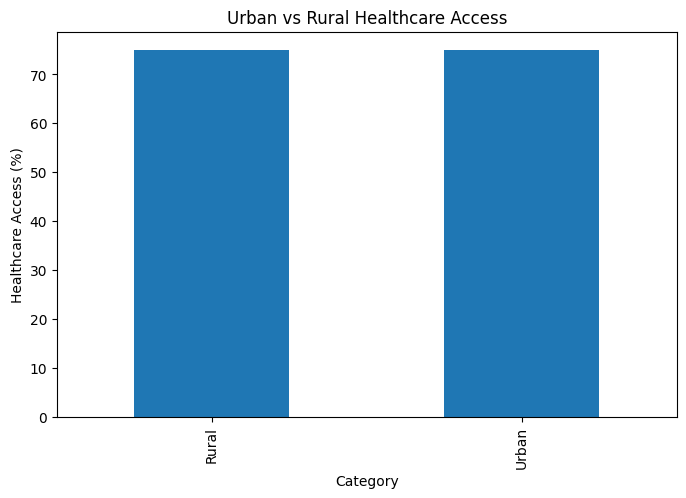

In [36]:
# Categorize into Urban and Rural
healthData['Urban vs Rural'] = healthData['Urbanization Rate (%)'].apply(
    lambda x: 'Urban' if x >= 50 else 'Rural'
)

# Group by Urban vs Rural
urban_rural_healthcare = healthData.groupby('Urban vs Rural')['Healthcare Access (%)'].mean()

# Print and visualize
print(urban_rural_healthcare)
urban_rural_healthcare.plot(kind='bar', figsize=(8, 5))
plt.title('Urban vs Rural Healthcare Access')
plt.ylabel('Healthcare Access (%)')
plt.xlabel('Category')
plt.show()


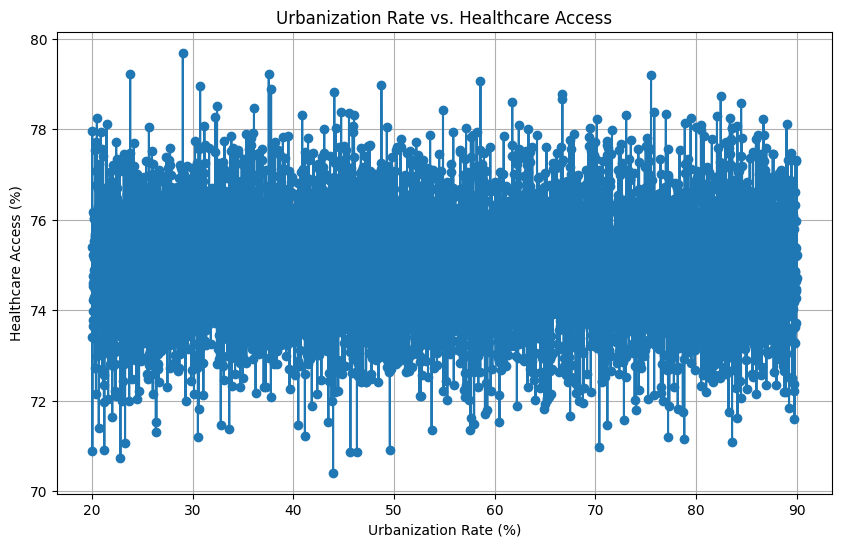

In [37]:
# Plot the data
urban_healthcare = healthData.groupby('Urbanization Rate (%)')['Healthcare Access (%)'].mean()
urban_healthcare.plot(kind='line', marker='o', figsize=(10, 6))

# Customize the plot
plt.title('Urbanization Rate vs. Healthcare Access')
plt.xlabel('Urbanization Rate (%)')
plt.ylabel('Healthcare Access (%)')
plt.grid(True)
plt.show()

From the data, we can establish correlations between the urbanization rate and healthcare access. Information like this is necessary to determine how ti improve healthcare and alleviate the spread of diseases.
The points appear relatively scattered, with healthcare access staying within a a narrow range (around 70-80%), regardless of the urbanization rate.
This suggests that healthcare access may not strongly correlate with urbanization rate or that their relationship is weak.

In [38]:
#tabular format
improvements = healthData.groupby(['Disease Name', 'Year'])['Improvement in 5 Years (%)'].mean()
print(improvements)


Disease Name         Year
Alzheimer's Disease  2000    4.959503
                     2001    4.960525
                     2002    4.888725
                     2003    5.091403
                     2004    4.980075
                               ...   
Zika                 2020    4.941858
                     2021    5.040334
                     2022    5.047616
                     2023    5.064828
                     2024    5.068112
Name: Improvement in 5 Years (%), Length: 500, dtype: float64


Above, we generated a table that allowed us to track diseases improvement over 5 year periods. With added contect, scientists can determine what cause these improvements in order to further prevent the spread of disease. Information like this can be matched with historical events, policy changes and scientific advancements in order to make quality of life improvements.

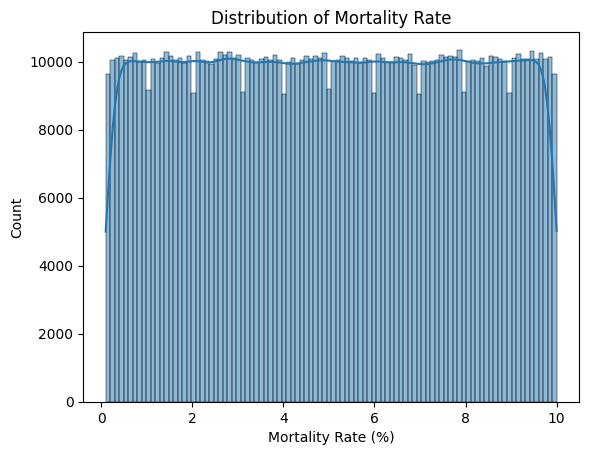

In [39]:
# Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Distribution of Mortality Rate
sns.histplot(healthData['Mortality Rate (%)'], kde=True)
plt.title('Distribution of Mortality Rate')
plt.show()

1. Uniform Distribution
The histogram shows that the data points are evenly distributed across the mortality rate range (0% to 10%).
This uniformity suggests that there is no skewness, and all ranges of mortality rates are represented equally in the dataset.
2. Frequency
Each mortality rate interval (bin) seems to have approximately the same count of data points (around 10,000 observations per bin). This indicates the dataset has been distributed in such a way that no mortality rate percentage range dominates.
3. Contextual Interpretation
The uniform distribution might be a result of how the data was simulated or sampled if this is not real-world data.
In real-world scenarios, mortality rates often show skewness or clustering around specific ranges (e.g., higher mortality in less developed regions). The uniformity here might indicate that the dataset doesn't reflect natural variability or was standardized for analysis.


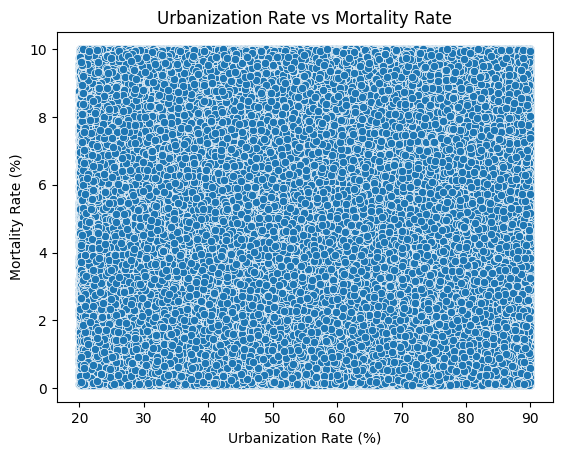

In [40]:
# Relationship between Mortality Rate and Urbanization Rate
sns.scatterplot(x='Urbanization Rate (%)', y='Mortality Rate (%)', data=healthData)
plt.title('Urbanization Rate vs Mortality Rate')
plt.xlabel('Urbanization Rate (%)')
plt.ylabel('Mortality Rate (%)')
plt.show()

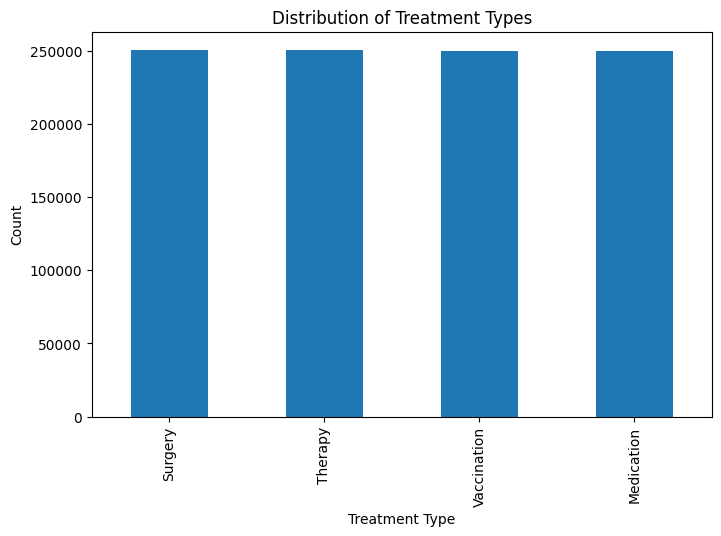

In [41]:
# Distribution of Treatment Types
treatment_counts = healthData['Treatment Type'].value_counts()
plt.figure(figsize=(8, 5))
treatment_counts.plot(kind='bar')
plt.title('Distribution of Treatment Types')
plt.ylabel('Count')
plt.show()

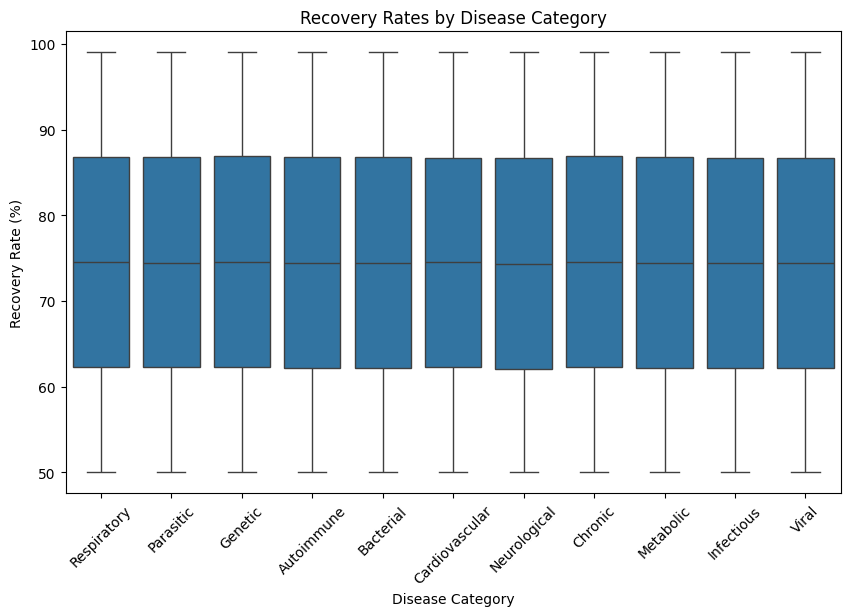

In [42]:
# Analysis of Recovery Rates by Disease Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Disease Category', y='Recovery Rate (%)', data=healthData)
plt.title('Recovery Rates by Disease Category')
plt.xticks(rotation=45)
plt.show()

The uniform distribution might be a result of how the data was simulated or sampled if this is not real-world data.
In real-world scenarios, health related data often show skewness or clustering around specific ranges (e.g., higher mortality in less developed regions). The uniformity here might indicate that the dataset doesn't reflect natural variability or was standardized specifically for analysis.
